### <center>📜 **<font color="green">Question 4:</font> The price of the accommodation by district and the statistics of the area of ​​the rooms (how much space most of the rooms occupy) and the link between the amount and the area of ​​each district (which is the most expensive or the average district). Why is that?** </center>


#### 📙**Import the necessary libraries**

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

### ✨ **1. Get data preprocessing**

In [63]:
# Read the data
df = pd.read_csv('../data/HCMHouseRentPreprocessing.csv')  
df.head(10)

,id,title,price,published,acreage,street,ward,district
0,0,"Cho thuê nhà trọ mới sạch đẹp tại Lê Đình Cẩn,...",2200000,2022-05-16,20.0,Lê Đình Cẩn,Phường Tân Tạo,Quận Bình Tân
1,1,Cho thuê phòng trọ giá rẻ ở mặt tiền hẻm lớn Đ...,2500000,2022-04-20,20.0,487/35/25 Đường Huỳnh Tấn Phát,Phường Tân Thuận Đông,Quận 7
2,2,Cho thuê phòng trọ kdc Nam Long-Trần Trọng Cun...,3500000,2022-05-10,30.0,Đường 10,Phường Tân Thuận Đông,Quận 7
3,3,Phòng trọ giá rẻ ngay cổng khu chế xuất Tân Th...,1500000,2022-05-05,30.0,283/15 Huỳnh Tấn Phát,Phường Tân Thuận Đông,Quận 7
4,4,"Cho thuê phòng có gác, không gác, tolet riêng ...",3500000,2022-01-05,18.0,Lê Văn Sỹ,Phường 14,Quận Phú Nhuận
5,5,"Phòng cho thuê dành cho người đi làm, gần nhiề...",2200000,2020-11-05,15.0,174/15 Đường Đặng Văn Ngữ,Phường 14,Quận Phú Nhuận
6,6,Cho thuê phòng ( nguyên tầng) ban công mặt tiề...,4500000,2022-03-10,20.0,311 Nguyễn Thiện Thuật,Phường 1,Quận 3
7,7,"PHÒNG ĐẸP MỚI XÂY,KHÔNG CHUNG CHỦ ,ĐƯỜNG AN DƯ...",3000000,2022-07-19,16.0,Đường số 4,Phường 16,Quận 8
8,8,"Phòng 25m2 full tiện nghi Nguyễn Thiện Thuật, ...",4500000,2022-03-30,25.0,Phố Nguyễn Thiện Thuật,Phường 1,Quận 3
9,9,Chính chủ cho thuê phòng 18m2 tai Đặng Văn Ngữ...,3000000,2020-11-05,18.0,Đường Đặng Văn Ngữ,Phường 14,Quận Phú Nhuận


### 🔥**2.Statistics on average price and area of ​​each district.**

In [64]:
# create new column price_per_square_meter
df['price_per_square_meter'] = df['price'] / df['acreage']

# group by district and calculate average price, acreage, price_per_square_meter
price_per_square_meter = round(df.groupby('district').price_per_square_meter.mean().sort_values(ascending=False), 3)

# create dataframe has district, price and acreage
new_df = pd.DataFrame({'district':price_per_square_meter.index, 'price_per_square_meter': price_per_square_meter.values})

# sort by price_per_square_meter
new_df = new_df.sort_values(by='price_per_square_meter', ascending=False)
new_df

,district,price_per_square_meter
0,Quận 1,192466.859
1,Quận 3,183088.257
2,Quận Phú Nhuận,175635.042
3,Quận Bình Thạnh,166744.056
4,Quận 4,160280.983
5,Quận 8,154985.582
6,Quận 5,153208.955
7,Quận 10,150137.404
8,Quận 11,149880.084
9,Quận Tân Bình,149443.678


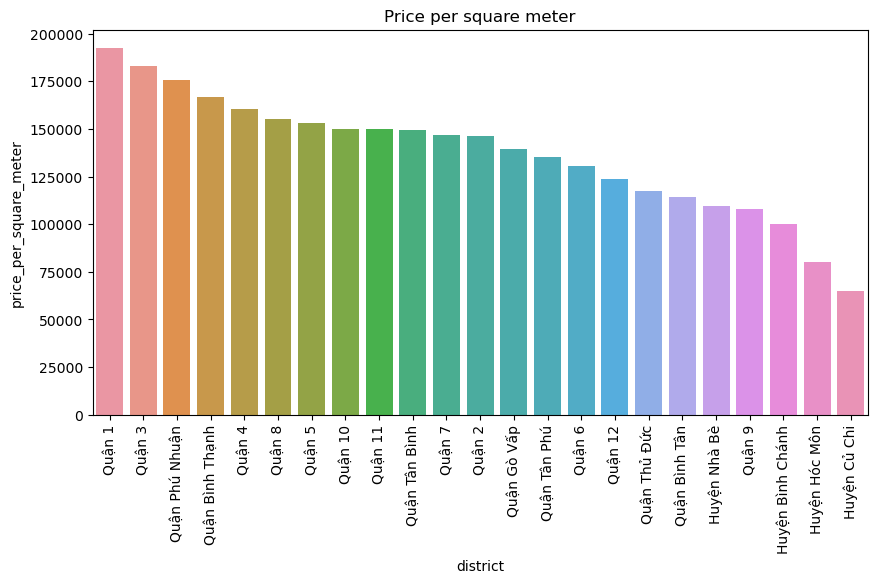

In [65]:
# visualize the price per square meter
plt.figure(figsize=(10, 5))
sns.barplot(x=new_df['district'], y=new_df['price_per_square_meter'])
plt.xticks(rotation=90)
plt.title('Price per square meter')
plt.show()

- <b>Comments:</b>
    - Based on the chart above, we can see that the rent of accommodation in District 1, District 3 is quite high compared to other districts (average 180000-190000/m^2). This may be due to the location of these districts in the city center, so many people rent rooms here.
    - Hoc Mon and Cu Chi districts are located far from the city center, with few schools and industrial parks, so the demand for rental accommodation here is quite small, so the rental price here is lower than other districts.(only) about 60000-80000/m^2)
    - The rest, the rental price in other districts is at the average level with the income of the people of the City. Because these districts are located near the city center, it is also convenient for students, students as well as workers.

### 📌**3. For each district, show the percentage of acreage **

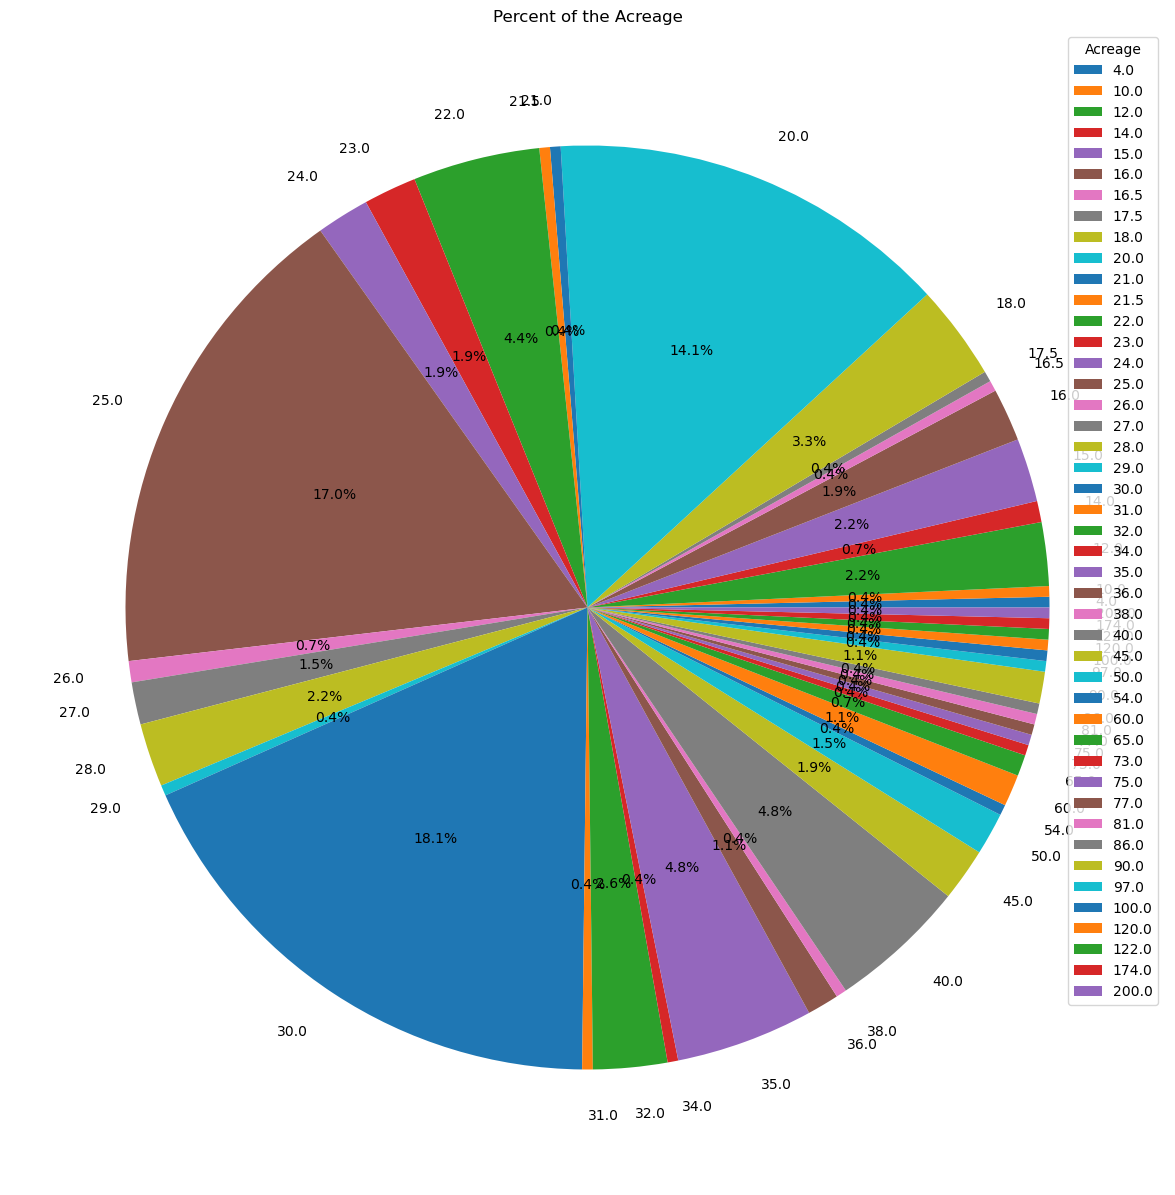

In [69]:
#choose district to visualize percent of the acreage
district = 'Quận 2'
choose_district = df[df['district'] == district]
choose_district = choose_district.sort_values(by='acreage', ascending=False)
choose_district.head(20)

#visualize percent of the acreage
plt.figure(figsize=(15, 15))

# calculate the percent of the acreage
percent = choose_district['acreage'].value_counts(normalize=True) * 100
percent = percent.sort_index()

# plot the percent of the acreage with pie chart with annotation
plt.pie(percent, labels=percent.index, autopct='%1.1f%%')
plt.title('Percent of the Acreage')
plt.legend(title='Acreage')
plt.show()

&#9889; <font color="yellow"><b>What are benefits of finding the answer? </b></font>
>- Knowing the price of accommodation in each district, combined with the area, we will know how different each district will be.
>- From there, you can find the right accommodation for each person's needs.